# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

# Read Data

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Technocolabs/Train.csv')
test=pd.read_csv('/content/drive/MyDrive/Technocolabs/Test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Info

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Describe

In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


# Data Corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


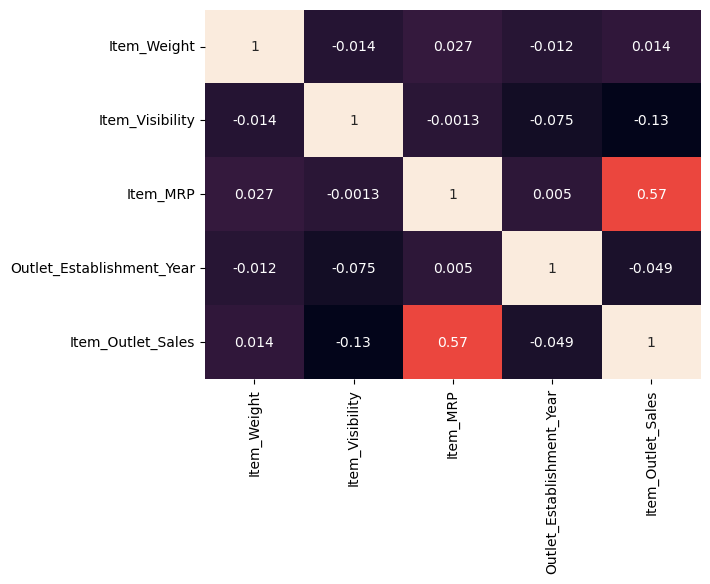

In [ ]:
corr=train.corr()
sns.heatmap(corr,annot=True,cbar=False)
corr

# Show Data contain null data

In [ ]:
data_=pd.DataFrame(train.isnull().sum(),columns=['Number Of Null'])
data_['Precision']=data_['Number Of Null']/len(train)*100
data_

,Number Of Null,Precision
Item_Identifier,0,0.000000
Item_Weight,1463,17.165317
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,2410,28.276428
Outlet_Location_Type,0,0.000000


# Show Data contain Duplicate data

In [ ]:
train[train.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Object Columns

In [ ]:
object=train.select_dtypes(include='object').columns
object

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# Data Visualization

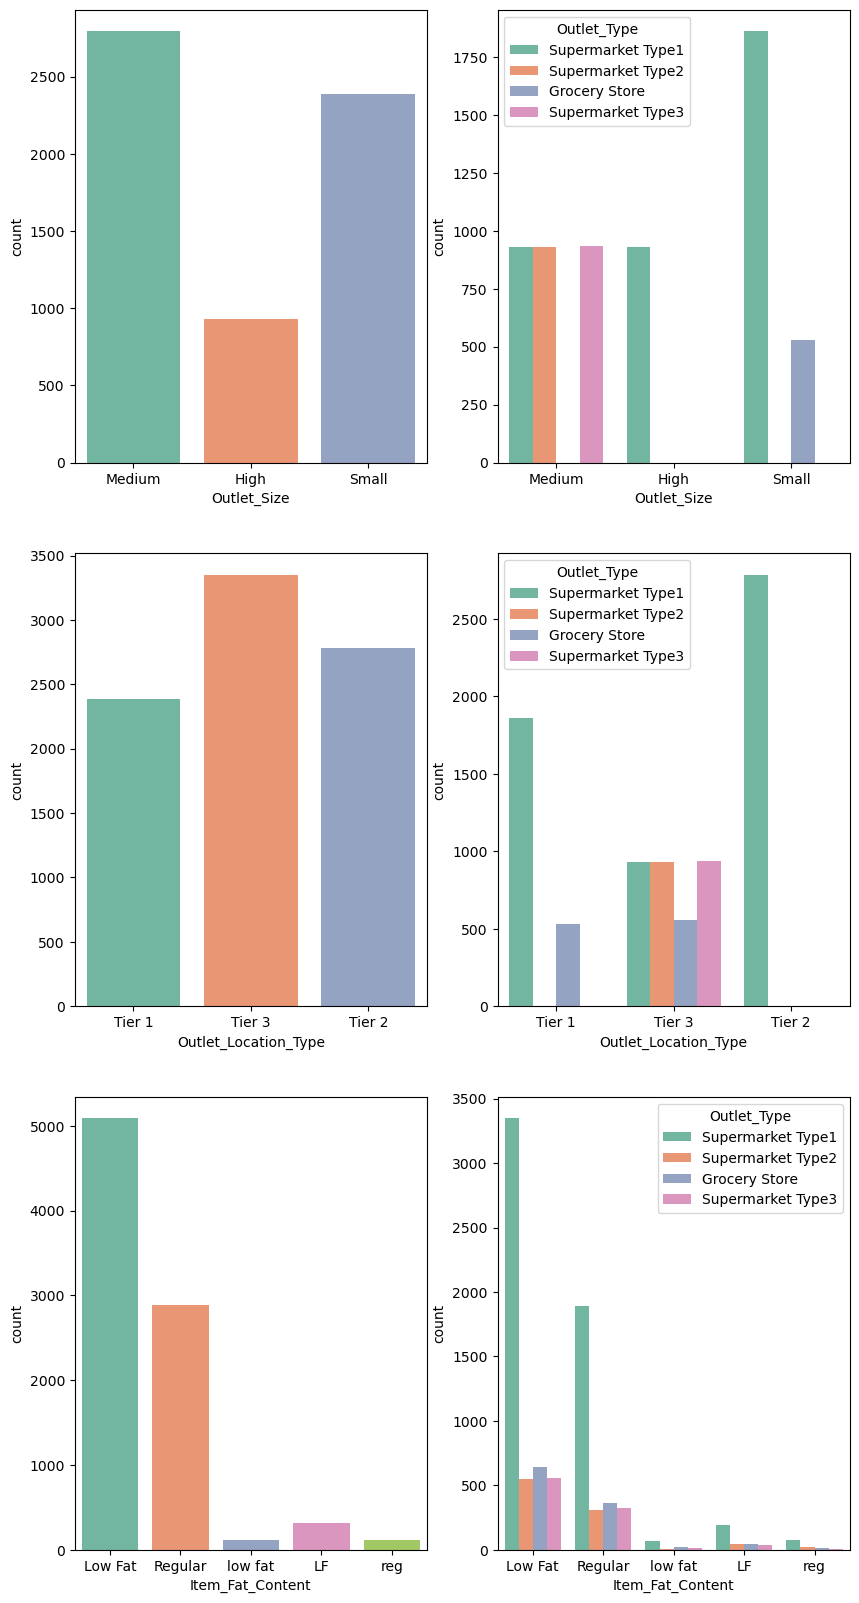

In [ ]:
plt.figure(figsize=(10,20))
i=1
for col in ['Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content']:
    plt.subplot(3,2,i)
    sns.countplot(x=col,data=train,palette='Set2')
    i+=1
    plt.subplot(3,2,i)
    sns.countplot(x=col,hue='Outlet_Type',data=train,palette='Set2')
    i+=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  # This is added back by InteractiveShellApp.init_path()


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

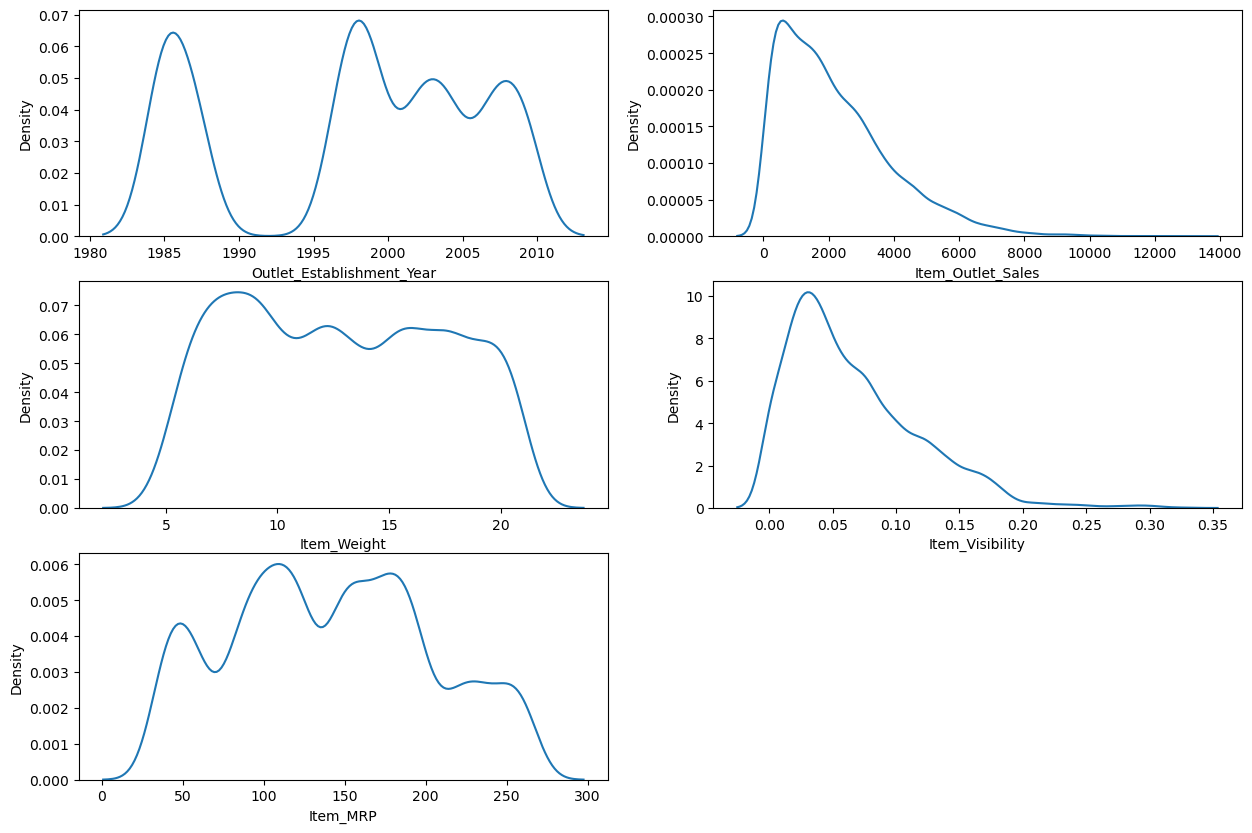

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.kdeplot(x='Outlet_Establishment_Year',data=train,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='Item_Outlet_Sales',data=train,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Item_Weight',data=train,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Item_Visibility',data=train,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='Item_MRP',data=train,palette='Set2')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

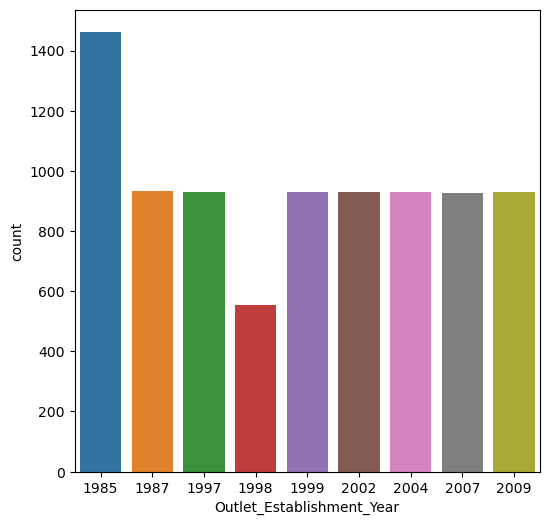

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

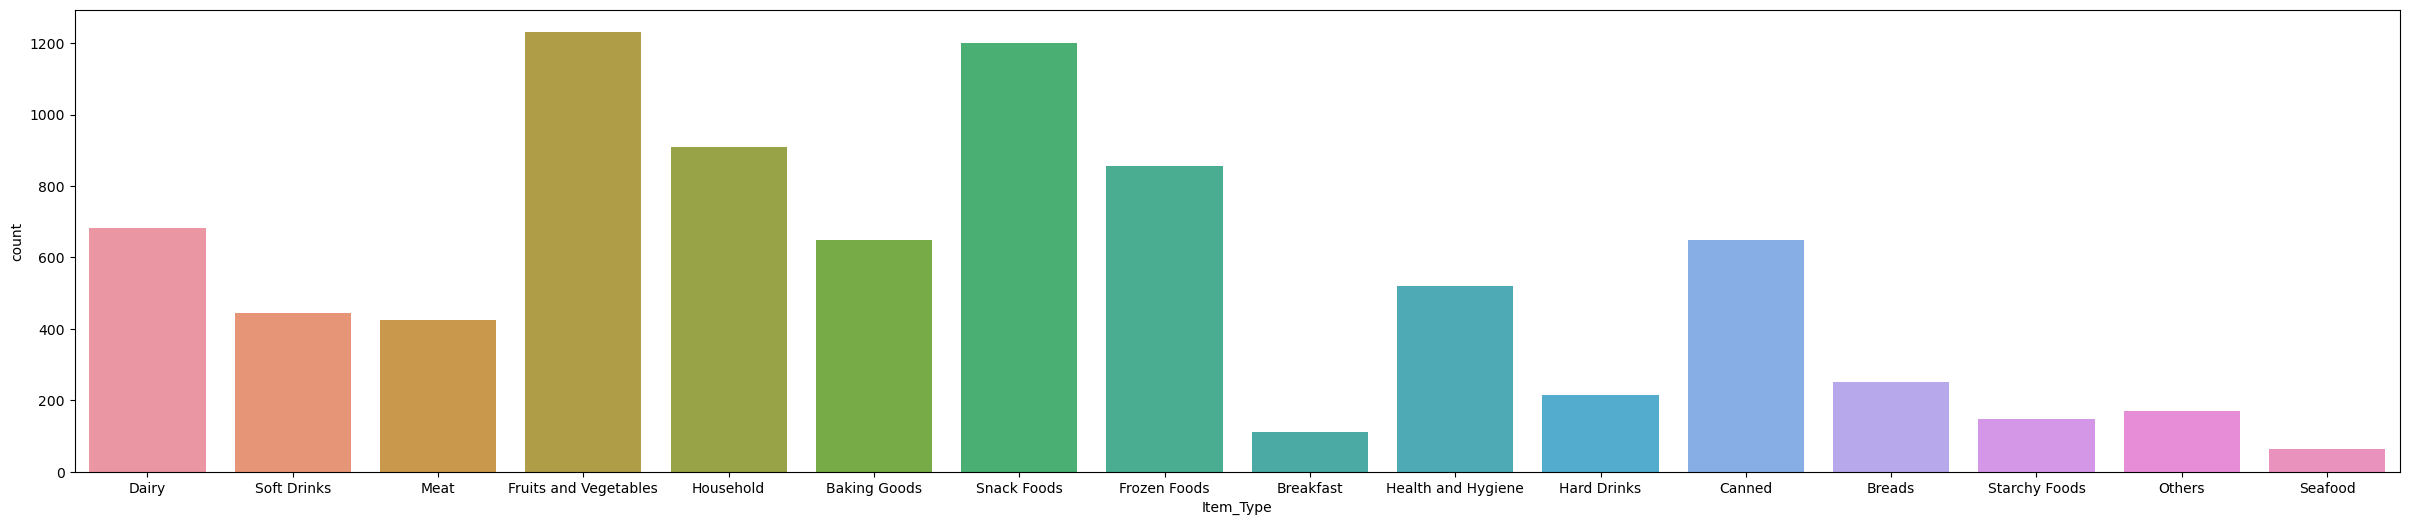

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=train)

# Show Input X and Output y

In [ ]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]
key=X.keys()
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [ ]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Transform object columns

In [ ]:
le = LabelEncoder()
for col in object:
    X[col]=le.fit_transform(X[col])
    test[col]=le.fit_transform(test[col])
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


# fill nan data

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X=imp.fit_transform(X)
test=imp.fit_transform(test)
X=pd.DataFrame(X,columns=key)
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998.0,3.0,2.0,0.0
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987.0,0.0,2.0,1.0
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002.0,3.0,1.0,1.0
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004.0,2.0,1.0,1.0
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009.0,1.0,2.0,2.0


# MinMaxScaler for Data

In [ ]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
test=scaler.fit_transform(test)
X=pd.DataFrame(X,columns=key)
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.25,0.048866,0.266667,0.927507,1.000000,0.583333,0.333333,0.0,0.333333
1,0.005135,0.081274,0.50,0.058705,0.933333,0.072068,0.333333,1.000000,0.333333,1.0,0.666667
2,0.424904,0.770765,0.25,0.051037,0.666667,0.468288,1.000000,0.583333,0.333333,0.0,0.333333
3,0.719512,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,1.000000,1.0,0.000000
4,0.832478,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.000000,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.237484,0.137541,0.25,0.172914,0.866667,0.777729,0.111111,0.083333,0.000000,1.0,0.333333
8519,0.575738,0.227746,0.50,0.143069,0.000000,0.326263,0.777778,0.708333,1.000000,0.5,0.333333
8520,0.870988,0.359929,0.25,0.107148,0.533333,0.228492,0.666667,0.791667,0.666667,0.5,0.333333
8521,0.437099,0.158083,0.50,0.442219,0.866667,0.304939,0.333333,1.000000,0.333333,1.0,0.666667


# Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (7670, 11)
X_test shape is  (853, 11)
y_train shape is  (7670,)
y_test shape is  (853,)


# Applying Random Forest Regressor Model

In [ ]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=7, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=33)

In [ ]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)

Random Forest Regressor Train Score is :  0.6400338862699297
Random Forest Regressor Test Score is :  0.6055870174313721
Random Forest Regressor No. of features are :  11


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_pred = RandomForestRegressorModel.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Predicted Value for Random Forest Regressor is :  [1339.09978623  820.32918174 1347.2745068  1315.03184264 1233.48783696
 2462.47198425 1679.53546773 2043.48185525 1666.28536977  212.50361496]


In [ ]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  736.5118017768801
Mean Squared Error Value is :  1050602.7519789364
Median Absolute Error Value is :  504.23910852460017


In [ ]:
y_test = RandomForestRegressorModel.predict(test)
y_test

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([1670.90666855, 1350.68216214,  643.22295729, ..., 1912.21854681,
       3762.54827564, 1298.51714858])

In [ ]:
y_test=pd.DataFrame(y_test,columns=['tem_Outlet_Sales'])
y_test.to_csv('/kaggle/working/prediction.csv')
y_test

,tem_Outlet_Sales
0,1670.906669
1,1350.682162
2,643.222957
3,2429.144007
4,6233.438808
...,...
5676,2123.664423
5677,2702.770707
5678,1912.218547
5679,3762.548276
